<a href="https://colab.research.google.com/github/KIQVinicius/Data-Science/blob/master/N2_2B_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import seaborn as sns

In [169]:
dados = pd.read_excel('/content/titanic_reduced_database.xlsx')
dados.head()

,id_passageiro,sobrevivente,classe_da_passagem,nome_passageiro,sexo,idade,irmaos_ou_esposa_a_bordo,pais_filhos_a_bordo,numero_passagem,valor_passagem,id_cabine,local_de_embarque
0,1,nao,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712833.00,C85,C
2,3,sim,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7925.00,NaN,S
3,4,sim,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,nao,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [170]:
#Substituir sexo por numeros
sobrevivente_replace = { 
    'nao' : 0,
    'sim': 1
}
sexo_replace = { 
    'female':0,
    'male': 1
}
embarque_replace = { 
    'S': 0,
    'C': 1,
    'Q': 2
}

In [171]:
dados['local_de_embarque'].value_counts()

S    644
C    168
Q     77
Name: local_de_embarque, dtype: int64

In [172]:
#dados['sobrevivente'].replace(sobrevivente_replace, inplace = True)
dados['sexo'].replace(sexo_replace, inplace = True)
dados['local_de_embarque'].replace(embarque_replace, inplace = True)

In [173]:
x = dados.drop('sobrevivente', axis='columns')
y = dados['sobrevivente']

In [174]:
x.describe()

,id_passageiro,classe_da_passagem,sexo,idade,irmaos_ou_esposa_a_bordo,pais_filhos_a_bordo,valor_passagem,local_de_embarque
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,8.910000e+02,889.000000
mean,446.000000,2.308642,0.647587,29.699118,0.523008,0.381594,1.271697e+05,0.362205
std,257.353842,0.836071,0.477990,14.526497,1.102743,0.806057,4.112720e+05,0.636157
min,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000e+00,0.000000
25%,223.500000,2.000000,0.000000,20.125000,0.000000,0.000000,1.445000e+01,0.000000
50%,446.000000,3.000000,1.000000,28.000000,0.000000,0.000000,7.100000e+01,0.000000
75%,668.500000,3.000000,1.000000,38.000000,1.000000,0.000000,7.895800e+04,1.000000
max,891.000000,3.000000,1.000000,80.000000,8.000000,6.000000,5.123292e+06,2.000000


In [175]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_passageiro             891 non-null    int64  
 1   classe_da_passagem        891 non-null    int64  
 2   nome_passageiro           891 non-null    object 
 3   sexo                      891 non-null    int64  
 4   idade                     714 non-null    float64
 5   irmaos_ou_esposa_a_bordo  891 non-null    int64  
 6   pais_filhos_a_bordo       891 non-null    int64  
 7   numero_passagem           891 non-null    object 
 8   valor_passagem            891 non-null    float64
 9   id_cabine                 204 non-null    object 
 10  local_de_embarque         889 non-null    float64
dtypes: float64(3), int64(5), object(3)
memory usage: 76.7+ KB


In [178]:
sobreviveu = dados.query("sobrevivente == 'sim'")
morreu = dados.query("sobrevivente == 'nao'")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f467b8fbbd0>]],
      dtype=object)

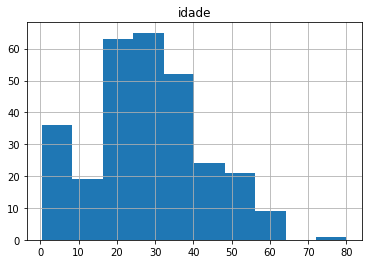

In [179]:
#Idade dos que sobreviveram
sobreviveu.hist('idade')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f467b7b3890>]],
      dtype=object)

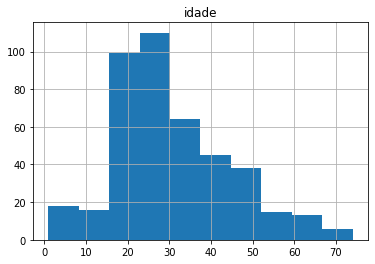

In [180]:
#Idade dos que morreram
morreu.hist('idade')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f467b909dd0>]],
      dtype=object)

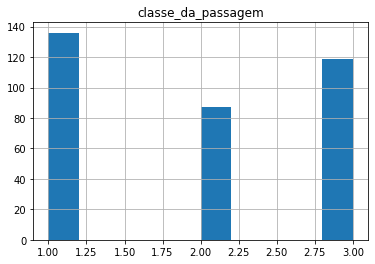

In [181]:
#classe dos que sobreviveram
sobreviveu.hist('classe_da_passagem')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f467b6c4b50>]],
      dtype=object)

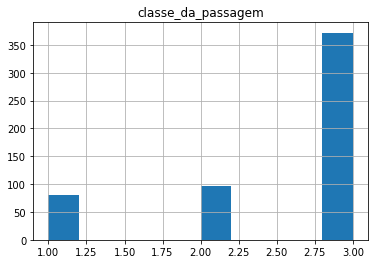

In [182]:
#classe dos que sobreviveram
morreu.hist('classe_da_passagem')

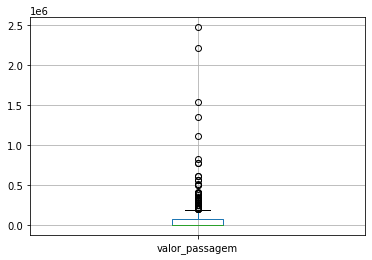

In [183]:
#Valor da passagem de quem morreu
morreu.boxplot("valor_passagem")

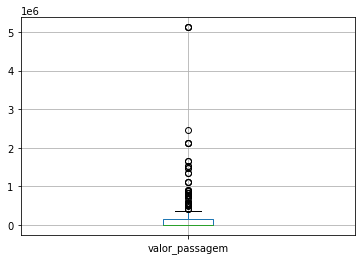

In [184]:
#Valor da passagem de quem sobreviveu
sobreviveu.boxplot("valor_passagem")

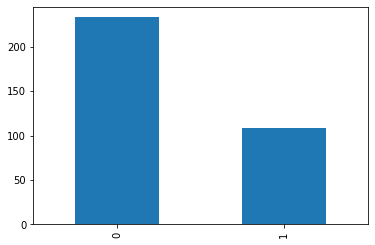

In [185]:
#Sexo dos sobreviventes
sobreviveu['sexo'].value_counts().plot.bar()

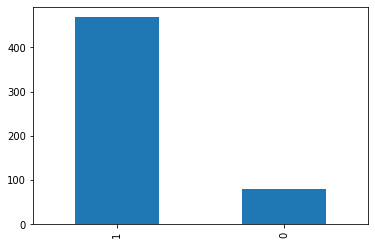

In [186]:
#Sexo dos que morreram
morreu['sexo'].value_counts().plot.bar()

In [187]:
dados['irmaos_ou_esposa_a_bordo'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: irmaos_ou_esposa_a_bordo, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f467b9c8c90>]],
      dtype=object)

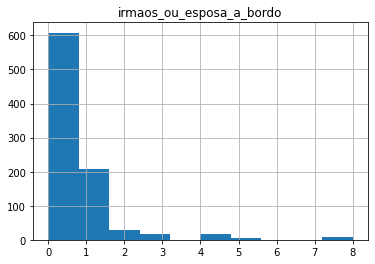

In [188]:
dados.hist('irmaos_ou_esposa_a_bordo')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f467b8f6190>]],
      dtype=object)

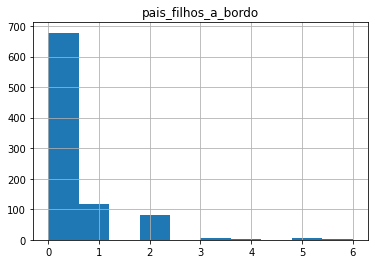

In [189]:
dados.hist('pais_filhos_a_bordo')

In [190]:
import matplotlib.pyplot as plt
import numpy as np

In [191]:
dados.drop(columns=['id_cabine'], inplace=True)
dados.dropna(inplace=True)
x = dados.drop(columns=['sobrevivente','id_passageiro','nome_passageiro','numero_passagem'])
y = dados['sobrevivente']

In [192]:
corr = dados.corr()

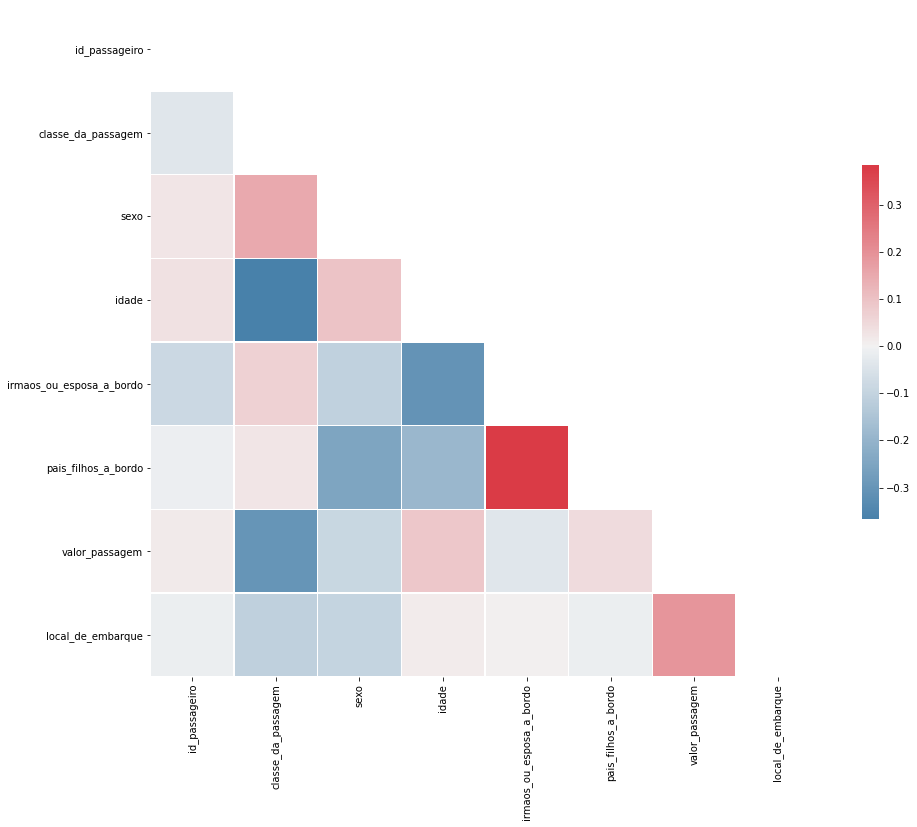

In [193]:
  mask = np.triu(np.ones_like(corr, dtype=np.bool))
  f, ax = plt.subplots(figsize=(15, 13))
  cmap = sns.diverging_palette(240, 10, as_cmap=True)
  sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [198]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz

In [199]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
list_classes = y.unique()

In [200]:
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                         test_size = 1/3)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(X_train), len(X_test)))

modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)
previsoes_SVC = modelo.predict(X_train)
acuracia = accuracy_score(y_train, previsoes_SVC) * 100
print("A acurácia foi de %.2f%%" % acuracia)

Treinaremos com 474 elementos e testaremos com 238 elementos
A acurácia foi de 99.16%


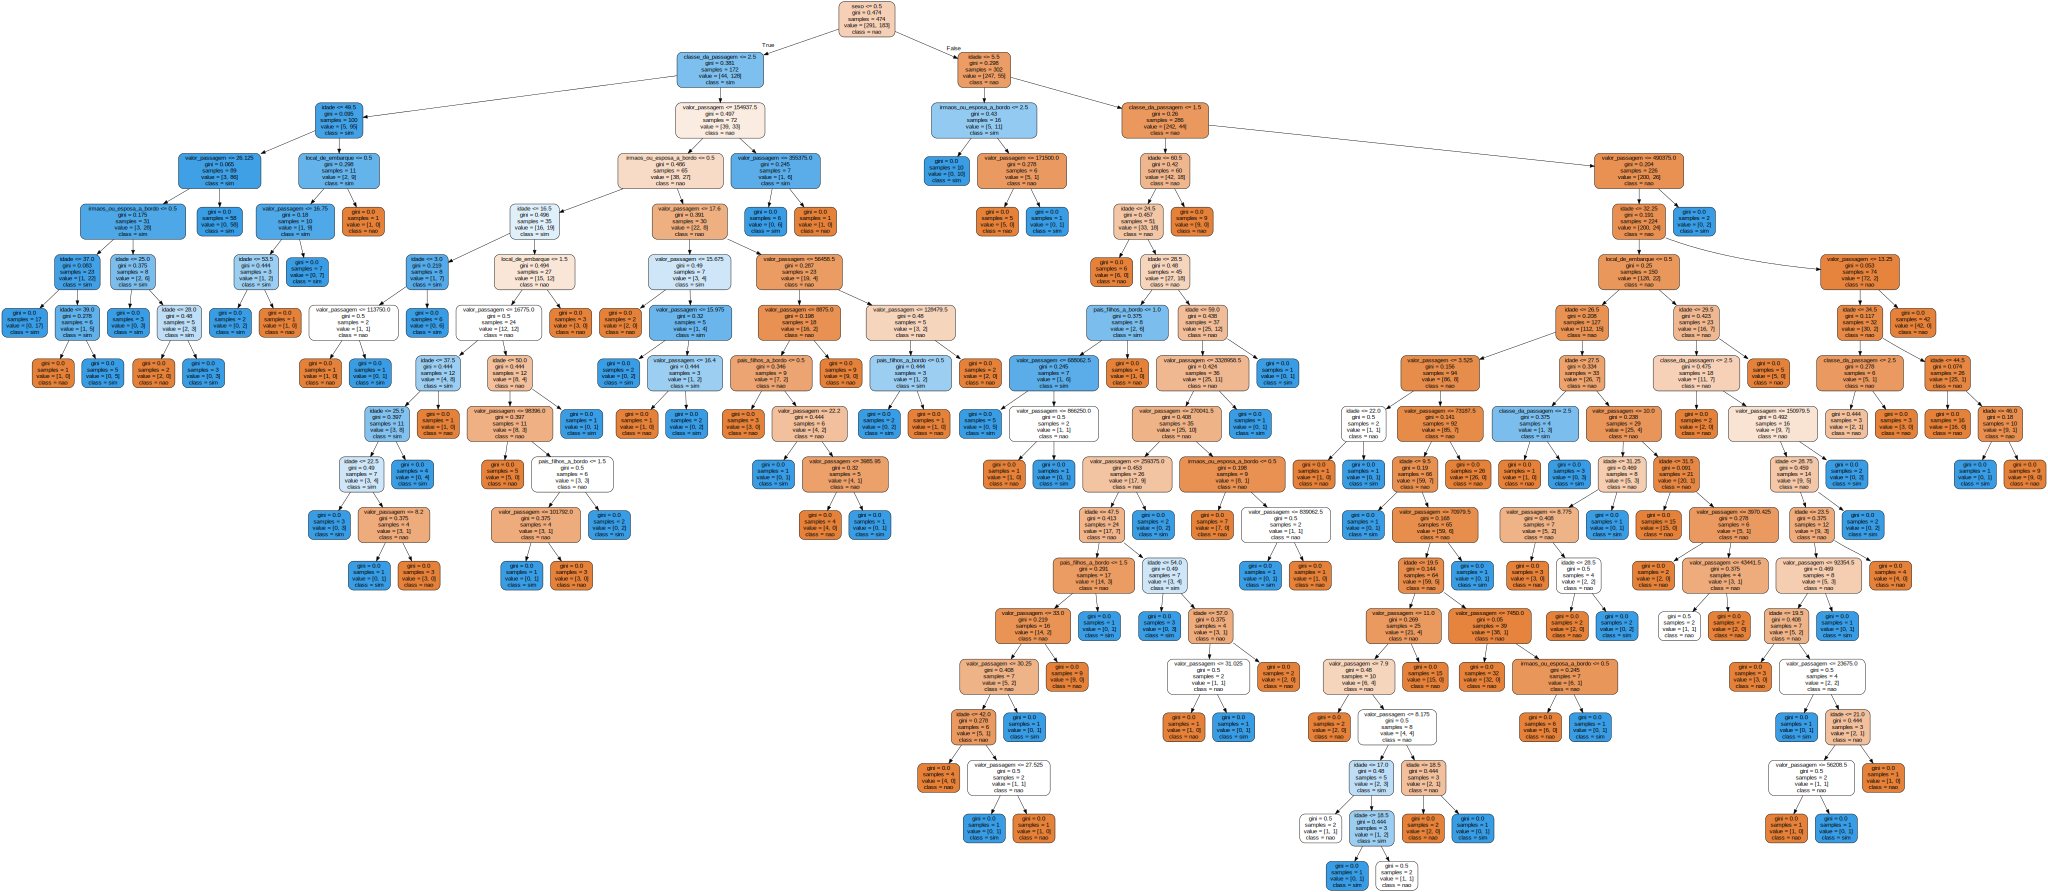

In [202]:
dot_data = export_graphviz(modelo, out_file=None,  feature_names = x.columns, filled=True, rounded=True, class_names=list_classes )
grafico = graphviz.Source(dot_data)
grafico